<a href="https://colab.research.google.com/github/JhonnCarvajal/TU-InstituteofTransportSciences/blob/main/CropVectorialImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First section download data for testing


# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd

# Load the box module from shapely to create box objects
from shapely.geometry import box
import earthpy as et
import seaborn as sns

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.


In [ ]:
# Import all of your data at the top of your notebook to keep things organized.
country_boundary_us_path = os.path.join("/","content","data", "spatial-vector-lidar", 
                                        "usa", "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(country_boundary_us_path)

state_boundary_us_path = os.path.join("/","content","data", "spatial-vector-lidar", 
                                      "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

pop_places_path = os.path.join("/","content","data", "spatial-vector-lidar", "global", 
                               "ne_110m_populated_places_simple", "ne_110m_populated_places_simple.shp")
pop_places = gpd.read_file(pop_places_path)

# Are the data all in the same crs?
print("country_boundary_us", country_boundary_us.crs)
print("state_boundary_us", state_boundary_us.crs)
print("pop_places", pop_places.crs)

country_boundary_us epsg:4326
state_boundary_us epsg:4326
pop_places epsg:4326


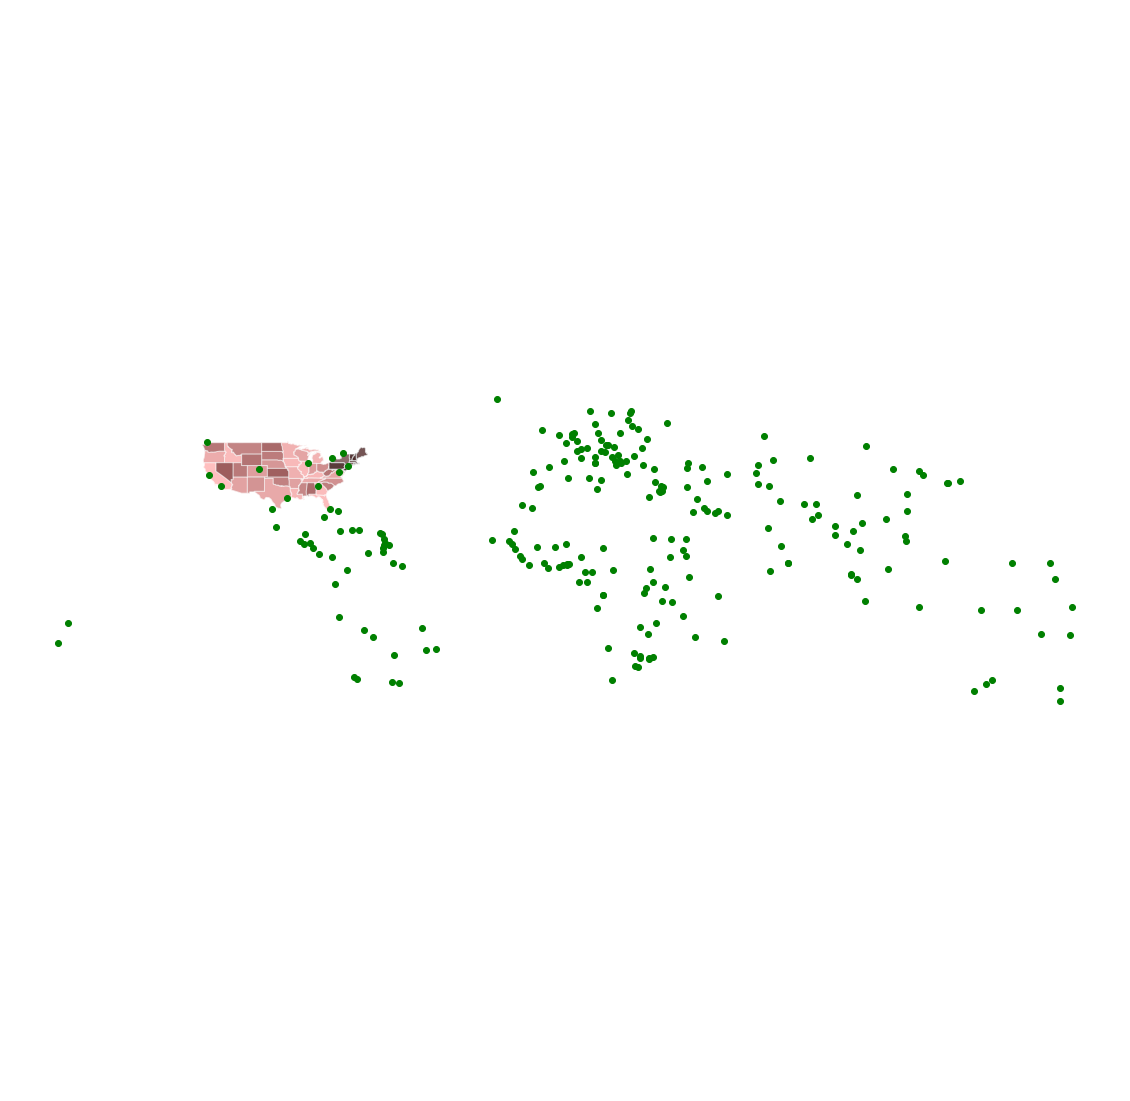

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(20, 20))

country_boundary_us.plot(alpha=.5,
                         ax=ax, color="red")

state_boundary_us.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)
pop_places.plot(ax=ax, color="green")

plt.axis('equal')
ax.set_axis_off()
plt.show()

In [ ]:
print("lugares llenos:\n", pop_places)

lugares llenos:
      scalerank  natscale  labelrank              featurecla            name  \
0            8        10          3         Admin-0 capital    Vatican City   
1            7        20          0         Admin-0 capital      San Marino   
2            7        20          0         Admin-0 capital           Vaduz   
3            6        30          8     Admin-0 capital alt         Lobamba   
4            6        30          8         Admin-0 capital      Luxembourg   
..         ...       ...        ...                     ...             ...   
238          0       600          1         Admin-1 capital  Rio de Janeiro   
239          0       600          1         Admin-1 capital       São Paulo   
240          0       600          3         Admin-1 capital          Sydney   
241          0       600          0         Admin-0 capital       Singapore   
242          0       600          0  Admin-0 region capital       Hong Kong   

    namepar              namealt  

In [ ]:
print("America en poligono:", country_boundary_us['geometry'])

America en poligono: 0    MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...
Name: geometry, dtype: geometry


In [ ]:
# Clip the data using GeoPandas clip

"""
There is a problem with the libraries that GC collect for geopandas so it is necessary re/installing geopandas by this way
!pip install pandas fiona shapely pyproj rtree
!pip install geopandas
"""
points_clip = gpd.clip(pop_places, country_boundary_us)

# View the first 6 rows and a few select columns
points_clip[['name', 'geometry', 'scalerank', 'natscale', ]]

,name,geometry,scalerank,natscale
178,Miami,POINT (-80.22605 25.78956),1,300
177,Houston,POINT (-95.34193 29.82192),1,300
179,Atlanta,POINT (-84.40190 33.83196),1,300
216,Los Angeles,POINT (-118.18193 33.99192),0,600
175,San Francisco,POINT (-122.41717 37.76920),1,300
217,"Washington, D.C.",POINT (-77.01136 38.90150),0,600
176,Denver,POINT (-104.98596 39.74113),1,300
218,New York,POINT (-73.98196 40.75192),0,600
180,Chicago,POINT (-87.75200 41.83194),1,300


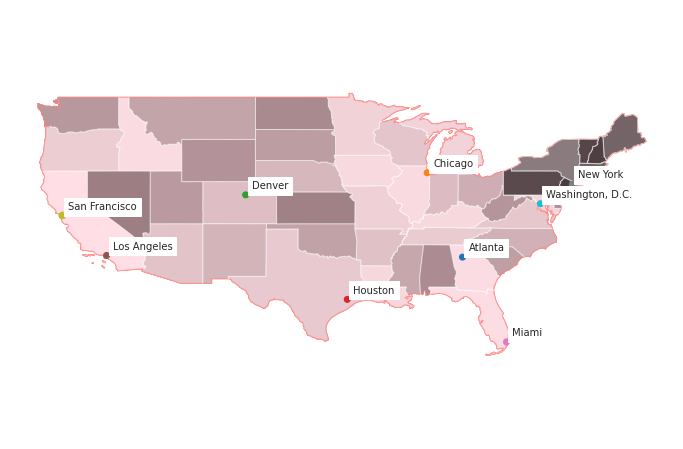

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1,
                         color="pink",
                         edgecolor="red",
                         ax=ax)

state_boundary_us.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)

points_clip.plot(ax=ax,
                 column='name') #Diferenciar por colores segun el criterio de la columna
ax.set_axis_off()
plt.axis('equal')

# Label each point 
points_clip.apply(lambda x: ax.annotate(s=x['name'],
                                        xy=x.geometry.coords[0],
                                        xytext=(6, 6),size=10, textcoords="offset points",
                                        backgroundcolor="white"),
                  axis=1)
plt.show()

In [ ]:
# Open the roads layer
ne_roads_path = os.path.join("/","content","data", "spatial-vector-lidar", "global", 
                             "ne_10m_roads", "ne_10m_roads.shp")
ne_roads = gpd.read_file(ne_roads_path)

# Are both layers in the same CRS?
if (ne_roads.crs == country_boundary_us.crs):
    print("Both layers are in the same crs!",
          ne_roads.crs, country_boundary_us.crs)

Both layers are in the same crs! epsg:4326 epsg:4326


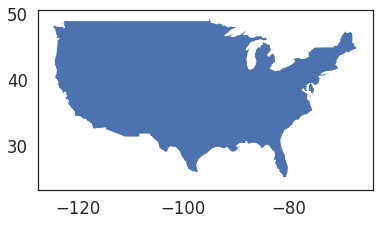

In [ ]:
# Simplify the geometry of the clip extent for faster processing
# Use this with caution as it modifies your data.
country_boundary_us_sim = country_boundary_us.simplify(
    .2, preserve_topology=True)
country_boundary_us.plot()

In [ ]:
# Clip data
ne_roads_clip = gpd.clip(ne_roads, country_boundary_us_sim)

# Ignore missing/empty geometries
ne_roads_clip = ne_roads_clip[~ne_roads_clip.is_empty]

print("The clipped data have fewer line objects (represented by rows):",
      ne_roads_clip.shape, ne_roads.shape)

The clipped data have fewer line objects (represented by rows): (7346, 32) (56601, 32)


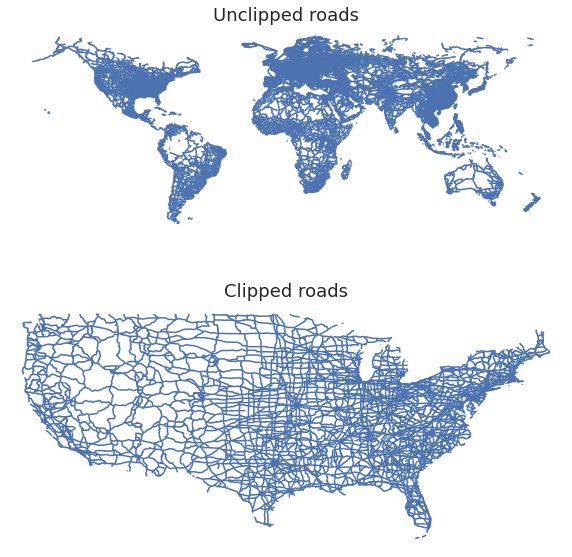

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ne_roads.plot(ax=ax1)
ne_roads_clip.plot(ax=ax2)

ax1.set_title("Unclipped roads")
ax2.set_title("Clipped roads")

ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()

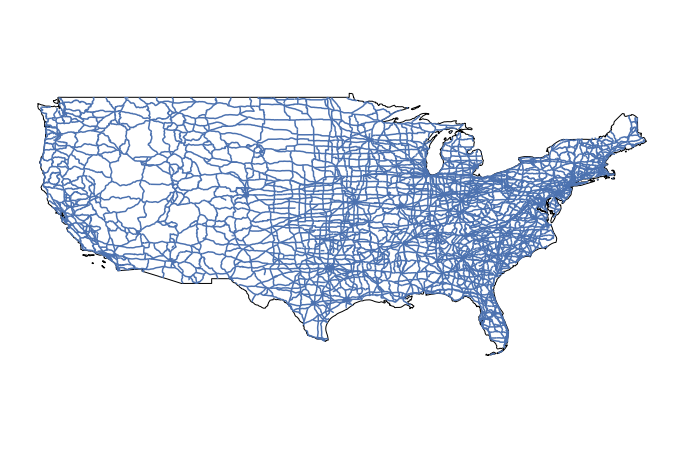

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

ne_roads_clip.plot(ax=ax)

ax.set_axis_off()
plt.axis('equal')
plt.show()

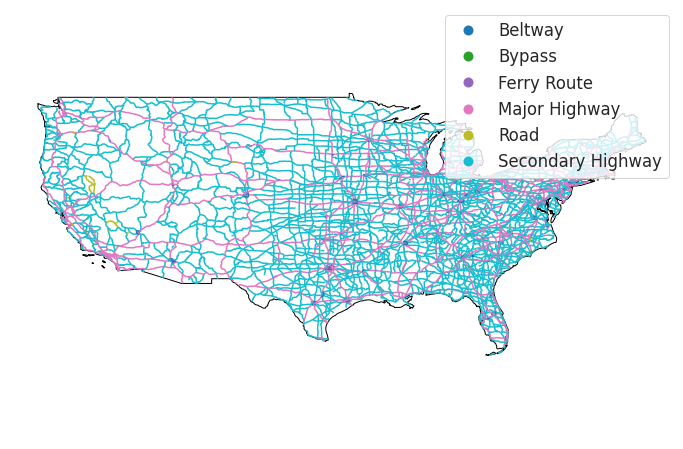

In [ ]:
# Plot the data by attribute
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1, 
                         color="white", 
                         edgecolor="black", 
                         ax=ax)

ne_roads_clip.plot(ax=ax, 
                   column='type', 
                   legend=True)
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [ ]:
ne_roads_clip

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
1453,3,Road,Major Highway,USA,None,New in version 2.0.0,5,None,None,None,...,0,0,None,57505,North America,1,Interstate,3.0,6.0,"LINESTRING Z (-122.86582 42.32476 0.00000, -12..."
1434,4,Road,Secondary Highway,USA,None,New in version 2.0.0,199,None,None,None,...,0,0,None,54205,North America,0,Federal,4.0,7.0,"LINESTRING Z (-123.30865 42.43937 0.00000, -12..."
1492,6,Road,Secondary Highway,USA,None,New in version 2.0.0,395,None,None,None,...,0,0,None,63005,North America,0,Federal,6.0,7.9,"LINESTRING Z (-120.34081 42.18757 0.00000, -12..."
50512,7,Road,Secondary Highway,USA,None,New in version 2.0.0,191,None,None,None,...,0,1856,US,16482,North America,0,Federal,7.0,8.0,"LINESTRING Z (-109.23033 41.60850 0.00000, -10..."
1753,8,Road,Secondary Highway,USA,None,New in version 2.0.0,385,None,None,None,...,0,0,None,99705,North America,0,Federal,7.1,9.0,"LINESTRING Z (-103.01654 42.81448 0.00000, -10..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,5,Road,Beltway,USA,None,New in version 2.0.0,229,None,None,None,...,0,0,None,0,North America,1,Interstate,5.0,8.0,"LINESTRING Z (-96.69013 43.60463 0.00000, -96...."
1553,8,Road,Secondary Highway,USA,None,New in version 2.0.0,71,None,None,None,...,0,0,None,71505,North America,0,Federal,7.1,9.6,"LINESTRING Z (-95.00042 43.64109 0.00000, -95...."
1532,8,Road,Secondary Highway,USA,None,New in version 2.0.0,218,None,None,None,...,0,0,None,68905,North America,0,Federal,7.1,9.6,"LINESTRING Z (-92.94256 43.50390 0.00000, -92...."
1539,3,Road,Major Highway,USA,None,New in version 2.0.0,35,None,None,None,...,0,0,None,69705,North America,1,Interstate,3.0,6.0,"LINESTRING Z (-93.34892 43.50390 0.00000, -93...."


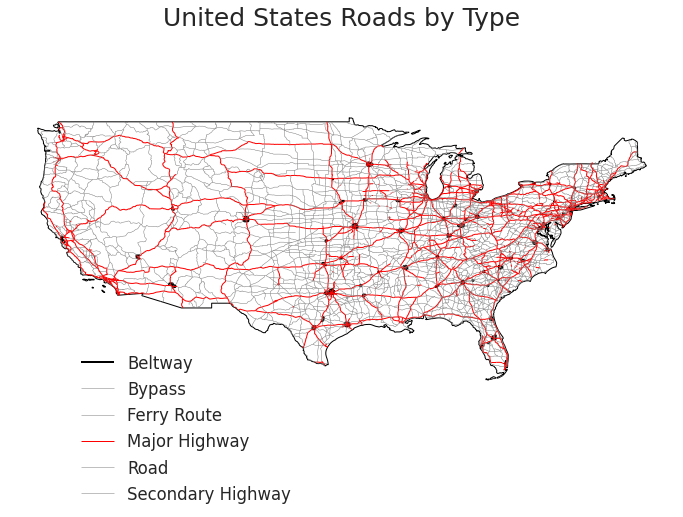

In [ ]:
# Plot with a custom legend

# First, create a dictionary with the attributes of each legend item
road_attrs = {'Beltway': ['black', 2],
              'Secondary Highway': ['grey', .5],
              'Road': ['grey', .5],
              'Bypass': ['grey', .5],
              'Ferry Route': ['grey', .5],
              'Major Highway': ['red', 1]}

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

for ctype, data in ne_roads_clip.groupby('type'):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              ax=ax,
              linewidth=road_attrs[ctype][1])

country_boundary_us.plot(alpha=1, color="white", edgecolor="black", ax=ax)

ax.legend(frameon=False, 
          loc = (0.1, -0.1))

ax.set_title("United States Roads by Type", fontsize=25)
ax.set_axis_off()

plt.axis('equal')
plt.show()